In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("life-expectancy-vs-gdp-per-capita.csv")
df = df[df['Year'] == 2018]

#df.columns

df.dropna(subset=['Life expectancy at birth (historical)','GDP per capita' ], inplace=True)

df = df[df['Entity'] != 'World']
df = df[df['Entity'] != 'Africa']
df = df[df['Entity'] != 'Americas']
df = df[df['Entity'] != 'Asia']
df = df[df['Entity'] != 'East Asia']
df = df[df['Entity'] != 'Eastern Europe']
df = df[df['Entity'] != 'Europe']
df = df[df['Entity'] != 'Latin America and the Caribbean']
df = df[df['Entity'] != 'North America']
df = df[df['Entity'] != 'Northern America']
df = df[df['Entity'] != 'Oceania']
df = df[df['Entity'] != 'North America']
df = df[df['Entity'] != 'South America']

print('Length Dataframe:', len(df))

gdp_capita = np.array(df['GDP per capita'])
life_exp = np.array(df['Life expectancy at birth (historical)'])

Length Dataframe: 165


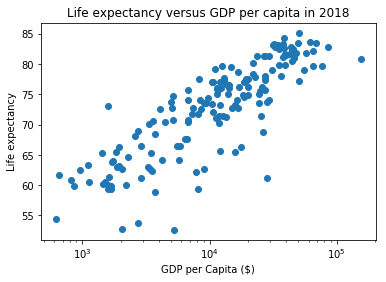

In [3]:
# Assignment 1a

plt.scatter(gdp_capita, life_exp)
plt.title("Life expectancy versus GDP per capita in 2018")
plt.xlabel("GDP per Capita ($)")
plt.ylabel("Life expectancy")
plt.xscale('log')


We filtered the data on year (we chose the most recent: 2018) and also removed the entities that were not countries

In [4]:
# Assignment 1b

life = pd.read_csv("life-expectancy.csv")
# df = df[df['Year'] == 2018]
# df = df[df['Entity'] != 'World']
# df = df[df['Entity'] != 'Africa']
# df = df[df['Entity'] != 'Americas']
# df = df[df['Entity'] != 'Asia']
# df = df[df['Entity'] != 'East Asia']
# df = df[df['Entity'] != 'Eastern Europe']
# df = df[df['Entity'] != 'Europe']
# df = df[df['Entity'] != 'Latin America and the Caribbean']
# df = df[df['Entity'] != 'North America']
# df = df[df['Entity'] != 'Northern America']
# df = df[df['Entity'] != 'Oceania']
# df = df[df['Entity'] != 'North America']
# df = df[df['Entity'] != 'South America']
#df.describe()

#print(long_life['Entity'].to_string(index=False))

In [5]:
mean_life = df['Life expectancy at birth (historical)'].describe(include='all').loc['mean']
std_life = df['Life expectancy at birth (historical)'].describe(include='all').loc['std']

print("The mean of life expectancy in 2018 is: {:.2f} years".format(mean_life))
print("The standard deviation of life expectancy in 2018 is: {:.2f} years".format(std_life))

long_life = df[df['Life expectancy at birth (historical)'] > mean_life+std_life]

print(long_life['Entity'].to_string(index=False))

The mean of life expectancy in 2018 is: 72.63 years
The standard deviation of life expectancy in 2018 is: 7.80 years
Australia
       Austria
       Belgium
        Canada
        Cyprus
       Denmark
       Finland
        France
       Germany
        Greece
     Hong Kong
       Iceland
       Ireland
        Israel
         Italy
         Japan
    Luxembourg
         Malta
   Netherlands
   New Zealand
        Norway
      Portugal
         Qatar
     Singapore
      Slovenia
   South Korea
         Spain
        Sweden
   Switzerland
        Taiwan
United Kingdom


In [13]:
# Assignment 1c

gdp = pd.read_csv("gross-domestic-product.csv")
gdp = gdp[gdp['Year'] == 2018]

df_all = pd.merge(df, gdp, how='left')

#print(df_all)

print(df_all.describe())

high_life = df_all['Life expectancy at birth (historical)'].describe(include='all').loc['75%']
low_gdp = df_all['GDP (constant 2015 US$)'].describe(include='all').loc['25%']

df_all_lohi = df_all[df_all['Life expectancy at birth (historical)']>high_life]
df_all_lohi = df_all[df_all['GDP (constant 2015 US$)']<low_gdp]

print(df_all_lohi['Entity'].to_string(index=False))



         Year  Life expectancy at birth (historical)  GDP per capita  \
count   165.0                             165.000000      165.000000   
mean   2018.0                              72.632121    19053.786587   
std       0.0                               7.795691    20346.341739   
min    2018.0                              52.600000      623.488900   
25%    2018.0                              66.300000     4440.382000   
50%    2018.0                              74.000000    12165.795000   
75%    2018.0                              78.700000    27370.555000   
max    2018.0                              85.200000   153764.170000   

       Population (historical estimates)  GDP (constant 2015 US$)  
count                       1.650000e+02             1.620000e+02  
mean                        4.598704e+07             5.017378e+11  
std                         1.575906e+08             1.943569e+12  
min                         7.084000e+04             3.519714e+08  
25%        

We defined high as being higher than the 75th percentile and low as being lower than the 25th percentile

In [14]:
# Assignment 1d

strong_high = df_all[df_all['Life expectancy at birth (historical)']>df_all['Life expectancy at birth (historical)'].describe(include='all').loc['75%']]
strong_high = df_all[df_all['GDP (constant 2015 US$)']>df_all['GDP (constant 2015 US$)'].describe(include='all').loc['75%']]

print(strong_high['Entity'].to_string(index=False))

print(df_all['Life expectancy at birth (historical)'].describe(include='all').loc['75%'])

Argentina
           Australia
             Austria
             Belgium
              Brazil
              Canada
               China
            Colombia
             Denmark
               Egypt
              France
             Germany
           Hong Kong
               India
           Indonesia
                Iran
             Ireland
              Israel
               Italy
               Japan
            Malaysia
              Mexico
         Netherlands
             Nigeria
              Norway
            Pakistan
         Philippines
              Poland
              Russia
        Saudi Arabia
           Singapore
        South Africa
         South Korea
               Spain
              Sweden
         Switzerland
            Thailand
              Turkey
United Arab Emirates
      United Kingdom
       United States
78.7


In [12]:
strong_low = df_all[df_all['Life expectancy at birth (historical)']<df_all['Life expectancy at birth (historical)'].describe(include='all').loc['25%']]
strong_low = df_all[df_all['GDP (constant 2015 US$)']>df_all['GDP (constant 2015 US$)'].describe(include='all').loc['75%']]

print(strong_low['Entity'].to_string(index=False))

Argentina
           Australia
             Austria
             Belgium
              Brazil
              Canada
               China
            Colombia
             Denmark
               Egypt
              France
             Germany
           Hong Kong
               India
           Indonesia
                Iran
             Ireland
              Israel
               Italy
               Japan
            Malaysia
              Mexico
         Netherlands
             Nigeria
              Norway
            Pakistan
         Philippines
              Poland
              Russia
        Saudi Arabia
           Singapore
        South Africa
         South Korea
               Spain
              Sweden
         Switzerland
            Thailand
              Turkey
United Arab Emirates
      United Kingdom
       United States
